##**PRACTICAL 10**

### **AIM:**
To implement mining Data Streams and Mining Time-series data.

### **THEORY:**
Data Stream Mining (also known as stream learning) is the process of extracting knowledge structures from continuous, rapid data records.
A data stream is an ordered sequence of instances that in many applications of data stream mining can be read only once or a small number of times using limited computing and storage capabilities.
Imagine a factory with 500 sensors capturing 10 KB of information every second, in one hour is captured nearby 36 GB of information and 432 GB daily. This massive information needs to be analysed in real time (or in the shortest time possible) to detect irregularities or deviations in the system and quickly react.
Stream Mining enables to analyse large amounts of data in real-time.

Install PySpark and related dependencies in Google Collab. Also Create and test a RDD.

Install Java, PySpark and FindSpark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [ ]:
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz



In [ ]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

Set environment variables 


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"


Check for executable files


In [ ]:
!ls

sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


Initialize findSpark


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession


Create RDD named sc


In [ ]:
sc = SparkSession.builder.master("local[*]").getOrCreate()
sc.conf.set("spark.sql.repl.eagerEval.enabled", True) 
# Property used to format output tables better



In [ ]:
#Creating spark context-Its like connecting to spark cluster
from pyspark import SparkConf 
from pyspark.context import SparkContext 
 
sc1 = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
print(sc1)


<SparkContext master=local[*] appName=pyspark-shell>



Create a Spark API to check the total number of Prime Numbers in the given range from 0 to n.


1.Define a function to check whether the number is prime or not?



In [ ]:
def isprime(n):
    """
    check if integer n is a prime
    """
    # make sure n is a positive integer
    n = abs(int(n))
    # 0 and 1 are not primes
    if n < 2:
        return False
    # 2 is the only even prime number
    if n == 2:
        return True
    # all other even numbers are not primes
    if not n & 1:
        return False
    # range starts with 3 and only needs to go up the square root of n
    # for all odd numbers
    for x in range(3, int(n**0.5)+1, 2):
        if n % x == 0:
            return False
    return True


2. Create a Spark RDD and parallelize the operation of checking the prime numbers using parallelize() operation.


In [ ]:
# Create an RDD of numbers from 0 to 1,000,000
nums = sc1.parallelize(range(1000000))


3. Get the total number of prime numbers using filter() operation.

In [ ]:
# Compute the number of primes in the RDD
print(nums.filter(isprime).count())



78498



 Write a Word Count API using PySpark and RDD.

1.Create a Spark RDD. 

In [ ]:
#Creating spark context-Its like connecting to spark cluster
from pyspark import SparkConf 
from pyspark.context import SparkContext 
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

2. Load the contents of the ex.txt file into ‘text’ RDD.


In [ ]:
text = sc.textFile("ex.txt")
print(text)


ex.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0


3. Import add 

In [ ]:
from operator import add


4.Define a function to split each line of text using  (Space)” “ seperator.

In [ ]:

def tokenize(text):
     return text.split()

5. Tokenize each sentence into words.

In [ ]:
words = text.flatMap(tokenize)
print(words)

PythonRDD[8] at RDD at PythonRDD.scala:53


6. Map each word to a tuple (word, 1), where one represents the  occurrence of a word.

In [ ]:

wc = words.map(lambda x: (x,1))
wc

PythonRDD[9] at RDD at PythonRDD.scala:53

7. Display the List of words.

In [ ]:
print(wc.toDebugString())

b'(2) PythonRDD[9] at RDD at PythonRDD.scala:53 []\n |  ex.txt MapPartitionsRDD[7] at textFile at NativeMethodAccessorImpl.java:0 []\n |  ex.txt HadoopRDD[6] at textFile at NativeMethodAccessorImpl.java:0 []'


8. Reduce all the words based on

In [ ]:
counts = wc.reduceByKey(add)
counts

PythonRDD[14] at RDD at PythonRDD.scala:53

9. Save word counts into a text file in ‘ec’ folder.

In [ ]:
counts.saveAsTextFile("wc")

10. Check the contents of wc. 

In [ ]:
!ls wc/

part-00000  part-00001	_SUCCESS


11. Display the List of words and their frequencies.


In [ ]:
!head wc/part-00000

('tempora', 13)
('sed', 9)
('eius', 6)
('quaerat', 4)
('consectetur', 7)
('ipsum', 8)
('ipsum.', 3)
('labore', 3)
('Ipsum', 4)
('porro', 9)


 Creating PySpark RDD


Prerequisite


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession


In [ ]:

from pyspark.sql import SparkSession
sc = SparkSession.builder.appName('SparkByExamples').getOrCreate()
 


Create Spark RDD Using Parallelized Collections
 
SparkContext has several functions to use with RDDs. For example, it’s parallelize() method is used to create an RDD from a list.
 


In [ ]:
#Create RDD from parallelize    
dataList = [("Hadoop", 10), ("MapReduce", 20), ("Spark", 30)]
rdd=sc.sparkContext.parallelize(dataList)
rdd


ParallelCollectionRDD[18] at readRDDFromFile at PythonRDD.scala:274

In [ ]:
words = sc.sparkContext.parallelize (
 ["scala",
 "java",
 "hadoop",
 "spark",
 "akka",
 "spark vs hadoop",
 "pyspark",
 "pyspark and spark"]
)
words


ParallelCollectionRDD[19] at readRDDFromFile at PythonRDD.scala:274

In [ ]:
#Example 3: Create empty RDD using sparkContext.emptyRDD
# Creates empty RDD with no partition    
rdd = sc.sparkContext.emptyRDD 
# rddString = spark.sparkContext.emptyRDD[String]
print(rdd)
#Example 4: Create empty RDD with Partition
#Create empty RDD with partition
rdd1 = sc.sparkContext.parallelize([],5) #This creates 5 partitions
print(rdd1)

<bound method SparkContext.emptyRDD of <SparkContext master=local[*] appName=pyspark-shell>>
ParallelCollectionRDD[21] at readRDDFromFile at PythonRDD.scala:274


 
# Create Spark RDD External Datasets


In [ ]:
#Create RDD from external Data source
rdd2 = sc.sparkContext.textFile("ex.txt")

In [ ]:
words=sc.sparkContext.parallelize(['one','two''three','four','five'])
 
w=words.filter(lambda x:'o' in x)
print(w) 
f=w.collect()
print(f)


PythonRDD[25] at RDD at PythonRDD.scala:53
['one', 'twothree', 'four']


##**TIME-SERIES DATA ANALYSIS**

### **THEORY:**
A time series is a sequence of data points recorded at specific time points - most often in regular time intervals (seconds, hours, days, months etc.).
Every organization generates a high volume of data every single day – be it sales figure, revenue, traffic, or operating cost.
It can be used for Trend Analysis, Outlier Detection, Unexcepted Variation, Association analysis, Predication and Forcasting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Files/stock_data.csv',parse_dates=True,
				index_col="Date")
df.head()

Unnamed: 0   Open   High    Low  Close    Volume  Name
Date                                                              
2006-01-03         NaN  39.69  41.22  38.79  40.91  24232729  AABA
2006-01-04         NaN  41.22  41.90  40.77  40.97  20553479  AABA
2006-01-05         NaN  40.93  41.73  40.85  41.53  12829610  AABA
2006-01-06         NaN  42.88  43.57  42.80  43.21  29422828  AABA
2006-01-09         NaN  43.10  43.66  42.82  43.42  16268338  AABA

We have used the ‘parse_dates’ parameter in the read_csv function to convert the ‘Date’ column to the DatetimeIndex format. By default, Dates are stored in string format which is not the right format for time series data analysis.

Now, removing the unwanted columns from dataframe i.e. ‘Unnamed: 0’.

In [ ]:
# deleting column
df.drop(columns='Unnamed: 0')


Open   High    Low  Close    Volume  Name
Date                                                  
2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA
...           ...    ...    ...    ...       ...   ...
2017-12-22  71.42  71.87  71.22  71.58  10979165  AABA
2017-12-26  70.94  71.39  69.63  69.86   8542802  AABA
2017-12-27  69.77  70.49  69.69  70.06   6345124  AABA
2017-12-28  70.12  70.32  69.51  69.82   7556877  AABA
2017-12-29  69.79  70.13  69.43  69.85   6613070  AABA

[3019 rows x 6 columns]

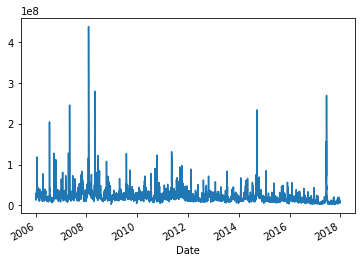

In [ ]:
df['Volume'].plot()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f29cc6a2890>,
      dtype=object)

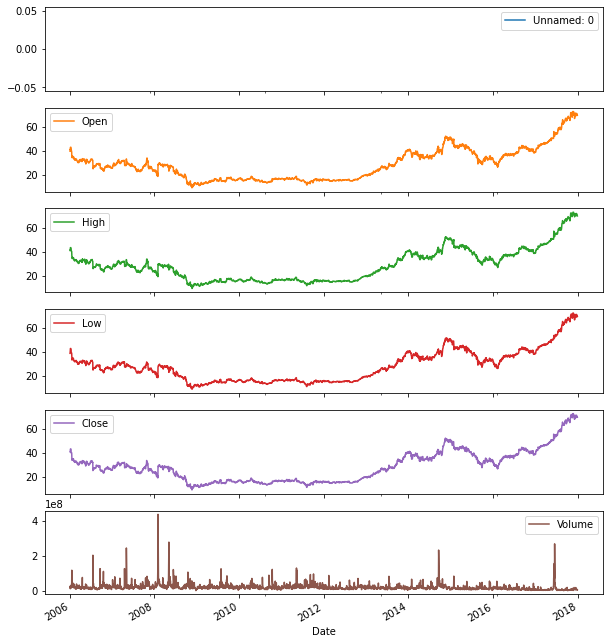

In [ ]:
df.plot(subplots=True, figsize=(10, 12))


Resampling: Resampling is a methodology of economically using a data sample to improve the accuracy and quantify the uncertainty of a population parameter. Resampling for months or weeks and making bar plots is another very simple and widely used method of finding seasonality. Here we are going to make a bar plot of month data for 2016 and 2017

<BarContainer object of 24 artists>

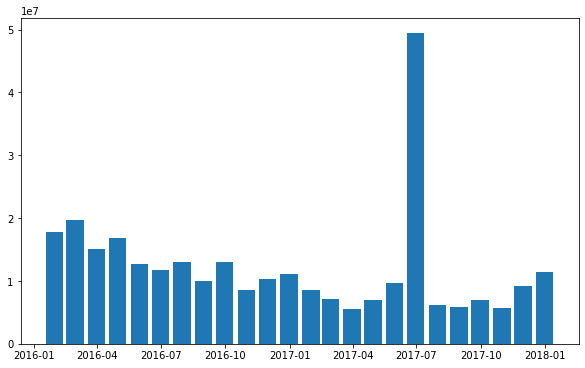

In [ ]:
# Resampling the time series data based on monthly 'M' frequency
df_month = df.resample("M").mean() #Y M H W

# using subplot
fig, ax = plt.subplots(figsize=(10, 6))

# plotting bar graph
ax.bar(df_month['2016':].index,
	df_month.loc['2016':, "Volume"],
	width=25, align='center')


Differencing: Differencing is used to make the difference in values of a specified interval. By default, it’s one, we can specify different values for plots. It is the most popular method to remove trends in the data.

     0    1    2
0  NaN  NaN  NaN
1  3.0 -3.0 -3.0
2 -4.0  5.0 -5.0


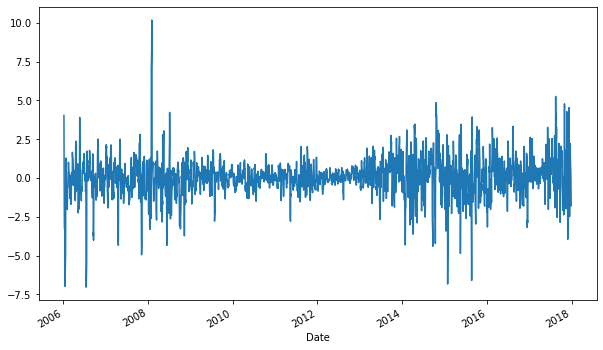

In [ ]:
df.Low.diff(4).plot(figsize=(10, 6))
import pandas as pd

data = [[10, 18, 11], [13, 15, 8], [9, 20, 3]]

df1 = pd.DataFrame(data)

print(df1.diff())

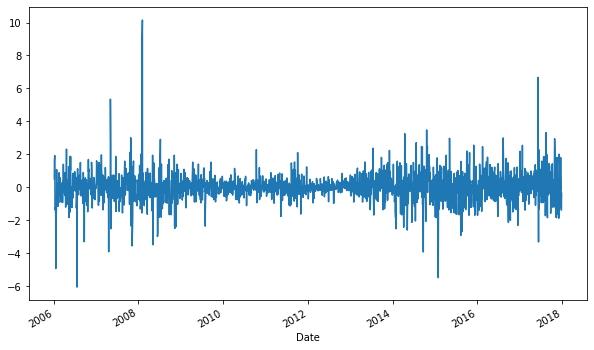

In [ ]:
df.High.diff(2).plot(figsize=(10, 6))


Shift: The shift function can be used to shift the data before or after the specified time interval. We can specify the time, and it will shift the data by one day by default. That means we will get the previous day’s data. It is helpful to see previous day data and today’s data simultaneously side by side.

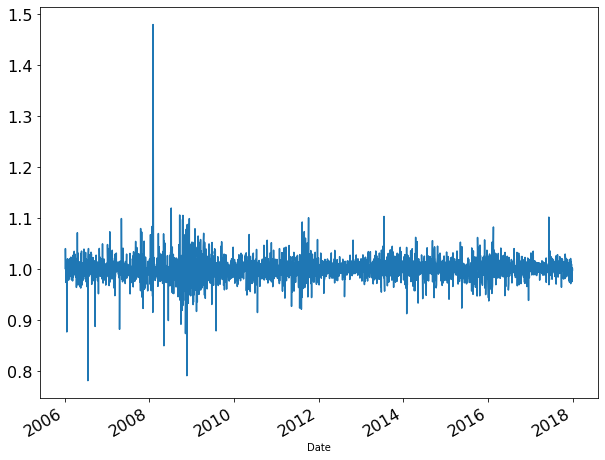

In [ ]:
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize=(10, 8), fontsize=16)


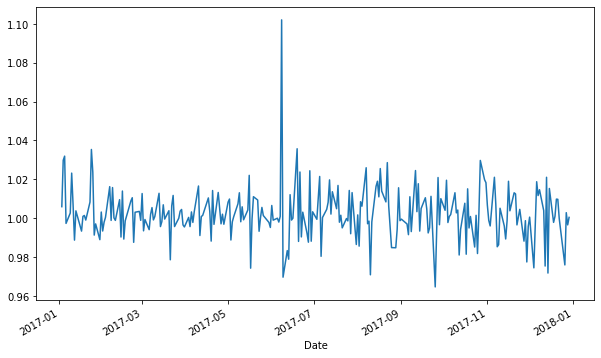

In [ ]:
df['2016']['Change'].plot(figsize=(10, 6))


### **Example:**

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

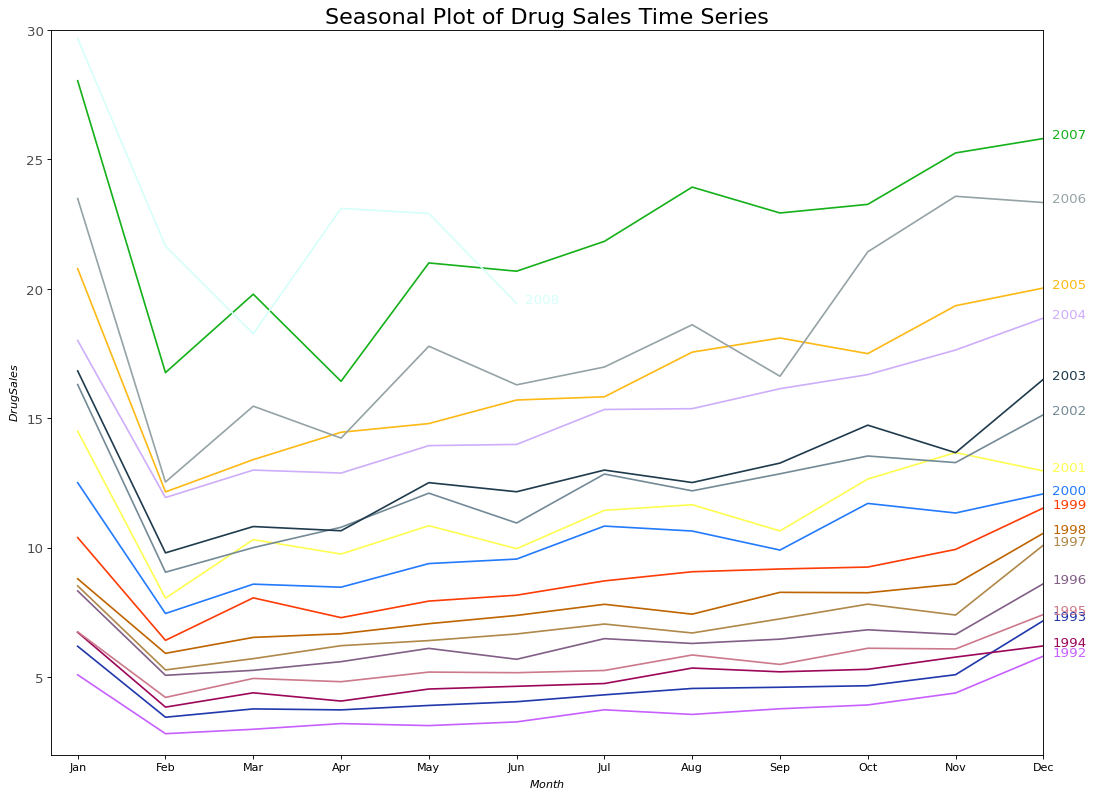

In [ ]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

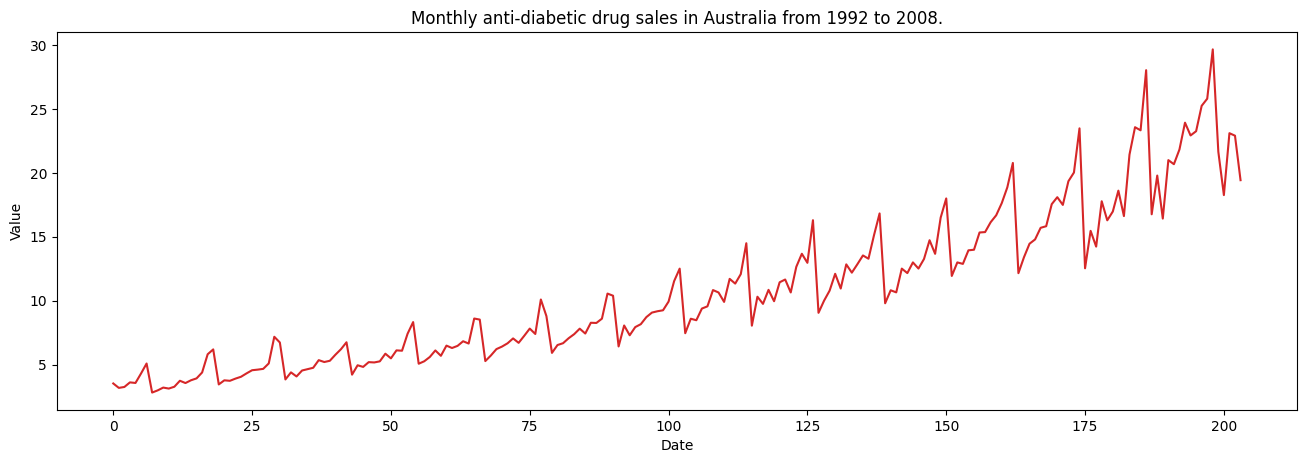

In [ ]:


# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')  

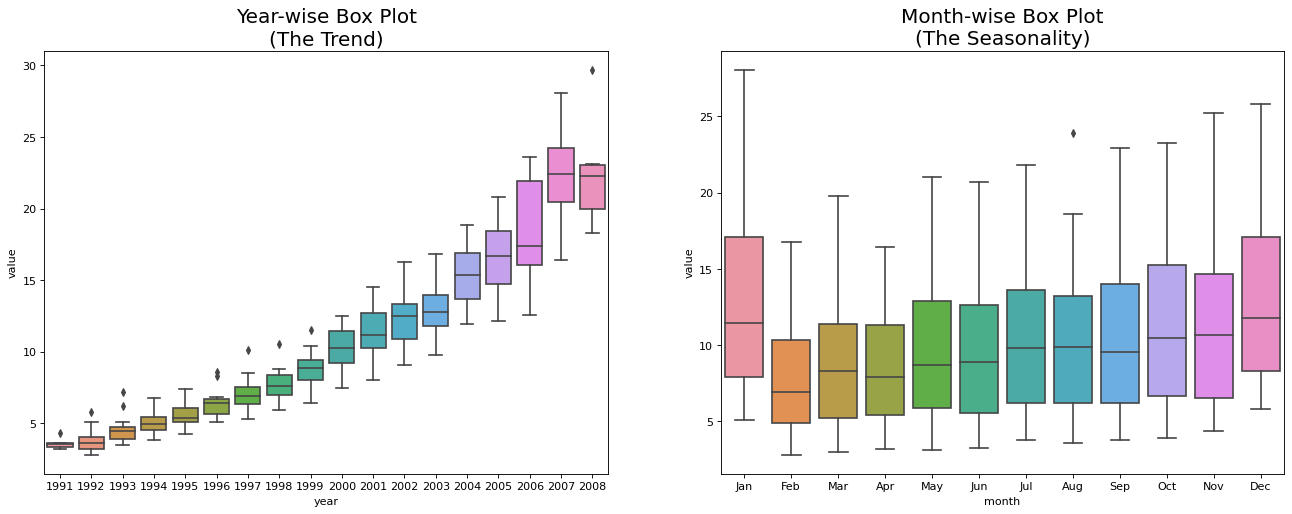

In [ ]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()